# Demo No. 9 - Radial velocities

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from astropy import units as u

from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from elisa.observer.observer import Observer

Along light curves, Elisa is capable of calculating radial velocity curves as well. We will now demonstrate, how to do it in the framework of Elisa. As usual we will start with defining the binary system and the observer class. In case of the Observer class, we do not have to specify observation passbands since we are interested only in radial velocities.

In [2]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.5,
    synchronicity=1.0,
    t_eff=6000 * u.K,
    gravity_darkening=1.0,
    albedo=0.6,
    metallicity=0,
)

binary_system = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=80 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

# observer = Observer(system=binary_system)
observer = Observer(passband=[], system=binary_system)

2020-04-13 21:58:23,159 - 4757 - binary_system.system - INFO: initialising object BinarySystem
2020-04-13 21:58:23,186 - 4757 - binary_system.system - INFO: setting discretization factor of secondary component to 5.11 according to discretization factor of the primary component.
2020-04-13 21:58:23,187 - 4757 - observer.observer - INFO: initialising Observer instance


Way to obtain of radial velocity curves is very similar to the calculation of the light curve:

In [3]:
phases, rvs = observer.rv(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01
)

The way to visualize the obtained data is also very similar:

<IPython.core.display.Javascript object>


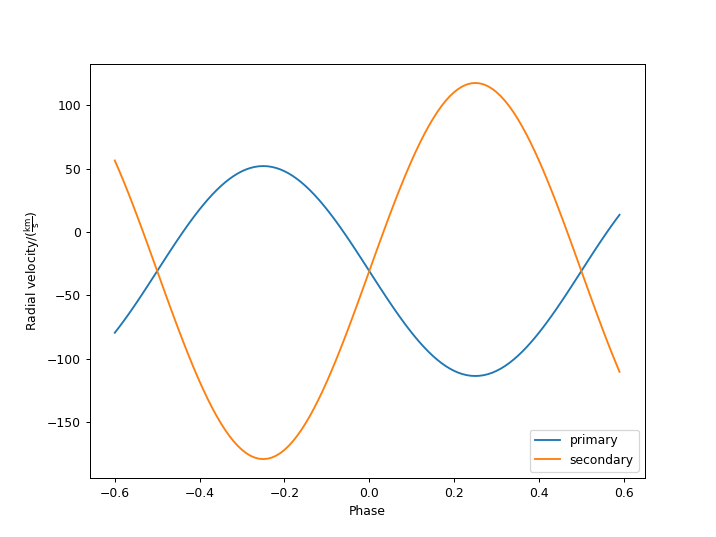

In [4]:
observer.plot.rv_curve(unit=u.km/u.s)